Como se aprecia varios de los términos que fueron procesados por los _stemmers_ incluyen números y caracteres especiales.

Entonces, es necesario realizar un estudio de las categorías de los textos del corpus con el fin de conocer diferencias sistemáticas entre las categorías. Para esto, realizaremos las siguientes actividades:

* Descargar la colección de textos del corpus
* Carga de la colección de textos del corpus a NLTK
* Contar, plotear y tabular distribuciones

## CLASSIC4 ORIGINAL DATABASE without stemming

### Descarga de la colección de textos del corpus
La estructura de directorios del corpus ha sido ajustada para ser leída por `NLTK`

In [2]:
import os
import classicdb.fetch as fetch

url = "https://sites.google.com/site/xchgdir/public/classic.tar.gz"
classic_home = os.path.join(fetch.get_data_home(), "classic_home")
corpus_root = os.path.join(classic_home, "classic-train")

print("downloading and extracting file from " + url)
fetch.download_and_unzip(url, classic_home, "classic.tar.gz")
print("downloaded and extracted to " + classic_home)

downloading and extracting file from https://sites.google.com/site/xchgdir/public/classic.tar.gz


downloaded and extracted to C:\Users\khas.aiur\scikit_learn_data\classic_home


### Carga del corpus a NLTK

In [3]:
from nltk.corpus import CategorizedPlaintextCorpusReader

print("reading categorized corpus from " + corpus_root)
corpus_reader = CategorizedPlaintextCorpusReader(corpus_root, r'.*', cat_pattern=r'(\w+)/*')

cats = corpus_reader.categories()
for cat in enumerate(cats):
    print(corpus_reader.fileids(categories=cat)[0:3], "...")

reading categorized corpus from C:\Users\khas.aiur\scikit_learn_data\classic_home\classic-train
['cacm/cacm.000001', 'cacm/cacm.000002', 'cacm/cacm.000003'] ...
['cisi/cisi.000001', 'cisi/cisi.000002', 'cisi/cisi.000003'] ...
['cran/cran.000001', 'cran/cran.000002', 'cran/cran.000003'] ...
['med/med.000001', 'med/med.000002', 'med/med.000003'] ...


### Estadísticas del corpus
Longitud promedio de palabra, longitud promedio de oración, score de diversidad léxica (__número de veces que cada palabra del vocabulario aparece en el texto en promedio__).
* La longitud promedio de palabra no varía pues es una característica propia del lenguaje. 
* La longitud promedio de oraciones y el score de diversidad léxica parecería tener un caracter discriminatorio apropiado. 

In [5]:
print("\tAWL*\tASL*\tLDS*")
for i, cat in enumerate(cats):
    num_chars = len(corpus_reader.raw(categories=cat))  # is counting spaces and punctuation too
    num_words = len(corpus_reader.words(categories=cat))
    num_sents = len(corpus_reader.sents(categories=cat))
    num_vocab = len(set(w.lower() for w in corpus_reader.words(categories=cat)))
    print(cat, "\t", 
          round(num_chars / num_words, 2), "\t", 
          round(num_words / num_sents, 2), "\t",
          round(num_words / num_vocab, 2), "\t", 
          cat)
print("*AWL = average word length")
print("*ASL = average sentence length")
print("*LDS = lexical diversity score (the number of times each vocabulary item appears in the text on average)")

	AWL*	ASL*	LDS*


cacm 	 5.97 	 23.0 	 20.3 	 cacm


cisi 	 5.95 	 32.7 	 20.71 	 cisi


cran 	 5.84 	 23.69 	 36.03 	 cran


med 	 6.07 	 25.0 	 13.56 	 med
*AWL = average word length
*ASL = average sentence length
*LDS = lexical diversity score (the number of times each vocabulary item appears in the text on average)


20 palabras más frecuentes de cada categoría, incluyendo stop-words y símbolos de puntuación (__en minúsculas__). Las primeras 50 palabras más frecuentes representan aproximadamente el 50% de todo el texto.

In [15]:
% matplotlib inline

from nltk.probability import FreqDist
from matplotlib import pyplot as plt

for i, cat in enumerate(cats):
    print("Category: " + cat.upper())
    freq_dist = FreqDist(w.lower() for w in corpus_reader.words(categories=cat))
    print(freq_dist)
    print(freq_dist.most_common(20), sep='\t')
    print()

Category: CACM


<FreqDist with 9695 samples and 196845 outcomes>
[('the', 11014), ('of', 9029), ('.', 7038), ('a', 5916), (',', 5232), ('and', 4536), ('to', 3770), ('is', 3727), ('in', 3446), ('for', 3164), ('-', 2793), ('are', 1988), ('(', 1934), ('algorithm', 1544), ('an', 1403), (')', 1389), ('on', 1245), ('by', 1227), ('be', 1201), ('which', 1183)]

Category: CISI


<FreqDist with 10121 samples and 209644 outcomes>
[('the', 13344), ('of', 11232), (',', 7881), ('and', 6406), ('in', 4630), ('to', 4612), ('a', 4383), ('.', 4378), ('..', 2788), ('is', 2599), ('for', 2408), ('-', 2098), ('are', 1690), ('information', 1596), ('that', 1550), ('this', 1422), ('as', 1378), ('on', 1353), ('library', 1273), ('by', 1201)]

Category: CRAN


<FreqDist with 7520 samples and 270952 outcomes>
[('the', 20181), ('of', 13969), ('.', 12361), (',', 6829), ('and', 6582), ('a', 6496), ('-', 5514), ('in', 5025), ('to', 4717), ('is', 4115), ('for', 3704), ('with', 2441), ('are', 2428), ('on', 2329), ('flow', 2179), ('at', 2074), ('by', 1799), ('that', 1569), ('an', 1517), ('boundary', 1371)]

Category: MED


<FreqDist with 13388 samples and 181477 outcomes>
[('the', 11240), ('of', 9342), ('.', 8335), (',', 5475), ('in', 5405), ('and', 4829), ('-', 3876), ('a', 2740), ('to', 2706), ('with', 1898), ('is', 1582), ('was', 1499), ('were', 1216), ('by', 1207), ('that', 970), ('(', 928), ('for', 925), ('be', 836), ('from', 833), ('as', 814)]



NLTK English stop words

In [6]:
from nltk.corpus import stopwords

print("NLTK's English Stop Words:", len(stopwords.words('english')))
print(stopwords.words('english')[0:10])

NLTK's English Stop Words: 153
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']


20 palabras más frecuentes de cada categoría __sin__ stop-words (__en minúsculas__).
* CACM: 9695 palabras no duplicadas. 196845 palabras en total.
 - ('algorithm', 1544), ('system', 1103), ('computer', 991), ('data', 728), ('program', 688), ('time', 673), ('method', 662), ('language', 617), ('programming', 528)
* CISI: 10121 palabras no duplicadas. 209644 palabras en total.
 - ('information', 1596), ('library', 1273), ('system', 770), ('libraries', 612), ('data', 601), ('research', 571), ('retrieval', 557), ('systems', 496), ('science', 459)
* CRAN: 7520 palabras no duplicadas. 270952 palabras en total.
 - ('flow', 2179), ('boundary', 1371), ('pressure', 1330), ('layer', 1189), ('number', 1031), ('mach', 911), ('results', 896), ('theory', 873), ('shock', 795), ('heat', 749)
* MED: 13388 palabras no duplicadas. 181477 palabras en total.
 - ('patients', 646), ('cells', 542), ('cases', 374), ('normal', 351), ('growth', 338), ('blood', 314)

Category: CACM


<FreqDist with 9577 samples and 126882 outcomes>
[('.', 7038), (',', 5232), ('-', 2793), ('(', 1934), ('algorithm', 1544), (')', 1389), ('system', 1103), ('computer', 991), ('data', 728), ('program', 688), ('time', 673), ('method', 662), ('language', 617), ('"', 585), ('programming', 528), ('systems', 518), ('paper', 514), ('described', 457), ('problem', 456), ('presented', 434), ('use', 433), ('given', 432), ('used', 419), ('number', 417), ('one', 403), ('programs', 398), ('[', 398), ('information', 378), ("'", 376), ('two', 358), ('storage', 340), ('using', 329), ('set', 324), ('problems', 313), ('discussed', 311), (':', 309), ('algorithms', 307), ('analysis', 304), ('n', 302), ('processing', 292), ('memory', 287), (';', 282), ('methods', 271), ('design', 269), ('new', 268), ('/', 264), ('general', 262), ('results', 261), ('technique', 259), ('model', 259)]


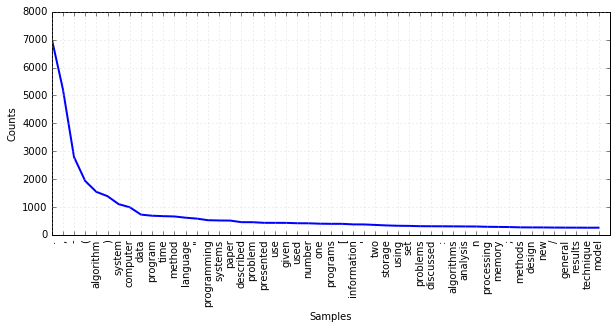


Category: CISI


<FreqDist with 9993 samples and 127746 outcomes>
[(',', 7881), ('.', 4378), ('..', 2788), ('-', 2098), ('information', 1596), ('library', 1273), ('(', 842), ('system', 770), ('"', 722), ("'", 663), ('libraries', 612), (')', 605), ('data', 601), ('research', 571), ('retrieval', 557), ('use', 526), (';', 503), (':', 498), ('systems', 496), ('science', 459), ('one', 457), ('scientific', 399), ('book', 367), ('study', 362), ('literature', 344), ('computer', 341), ('used', 338), ('analysis', 334), ('new', 332), ('subject', 329), ('indexing', 301), ('terms', 297), ('two', 292), ('index', 289), ('problems', 273), ('services', 271), ('results', 271), ('work', 267), ('paper', 263), ('search', 255), ('number', 250), ('time', 241), ('may', 241), ('document', 241), ('made', 239), ('based', 239), ('journals', 239), ('methods', 239), ('classification', 237), ('user', 236)]


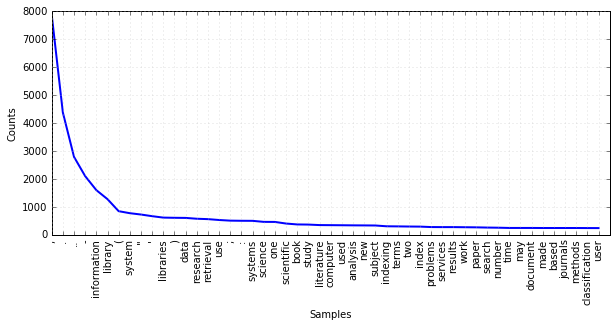


Category: CRAN


<FreqDist with 7401 samples and 171862 outcomes>
[('.', 12361), (',', 6829), ('-', 5514), ('flow', 2179), ('boundary', 1371), ('pressure', 1330), ('layer', 1189), ('number', 1031), ('mach', 911), ('results', 896), ('theory', 873), ('shock', 795), ('heat', 749), ('method', 737), ('two', 693), ('(', 646), ('wing', 641), ('supersonic', 629), ('surface', 623), ('/', 606), ('body', 600), ('effects', 598), ('transfer', 581), ('temperature', 564), ('obtained', 542), ('laminar', 531), ('solution', 528), ('velocity', 526), (')', 525), ('given', 524), ('equations', 508), ('1', 506), ('ratio', 491), ('0', 475), ('jet', 474), ('effect', 468), ('experimental', 468), ('hypersonic', 462), ('plate', 455), ('made', 448), ('analysis', 442), ('free', 437), ('conditions', 425), ('presented', 422), ('found', 422), ('distribution', 419), ('dimensional', 416), ('numbers', 414), ('stream', 409), ('reynolds', 407)]


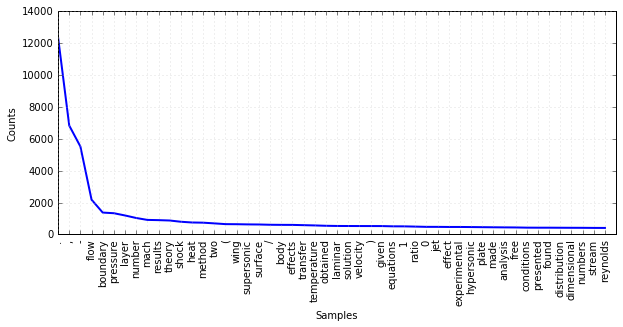


Category: MED


<FreqDist with 13265 samples and 117725 outcomes>
[('.', 8335), (',', 5475), ('-', 3876), ('(', 928), (')', 700), ('patients', 646), ('cells', 542), ('2', 421), ("'", 399), ('cases', 374), ('1', 372), ('normal', 351), ('growth', 338), ('may', 327), ('blood', 314), ('3', 298), ('found', 289), ('/', 288), ('treatment', 285), ('5', 273), ('children', 272), ('cell', 261), ('one', 251), ('4', 244), ('changes', 232), ('hormone', 226), (';', 222), ('human', 220), ('also', 216), ('dna', 214), ('results', 214), ('increased', 213), ('rats', 212), ('disease', 212), ('effect', 212), ('cancer', 199), ('group', 197), ('%', 195), ('6', 194), ('two', 193), ('tissue', 190), ('study', 189), ('10', 187), ('acid', 184), ('liver', 177), ('plasma', 175), ('renal', 174), ('studies', 172), ('time', 170), ('kidney', 165)]


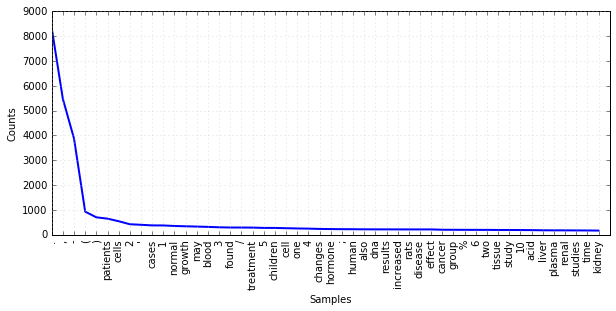

In [22]:
% matplotlib inline

from nltk.probability import FreqDist
from nltk.corpus import stopwords
from matplotlib import pyplot as plt

stops = set(stopwords.words('english'))
for i, cat in enumerate(cats):
    print("Category: " + cat.upper())
    freq_dist = FreqDist(w.lower() for w in corpus_reader.words(categories=cat) if w.lower() not in stops)
    print(freq_dist)
    print(freq_dist.most_common(50), sep='\t')
    plt.figure(figsize=(10, 4))
    freq_dist.plot(50, cumulative=False)
    print()

Logintud de palabras por cada categorías __con__ y __sin__ stop words.

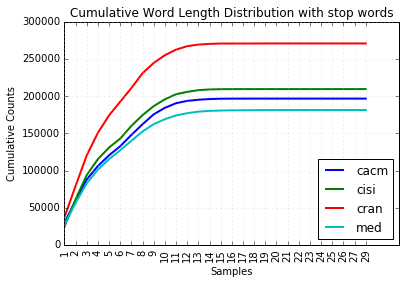

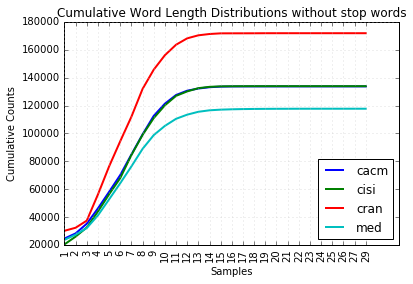

In [25]:
% matplotlib inline

from nltk.probability import ConditionalFreqDist

# Build tables: word length frequency by category
# for i, cat in enumerate(cats):
#     print("Word length by category: ", cat.upper())
#     freq_dist = FreqDist(len(word) for word in corpus_reader.words(categories=cat))
#     # import operator
#     # sorted_items = sorted(freq_dist.items(), key=operator.itemgetter(1)) # sort by item.value
#     # for i, k in enumerate(sorted_items):
#     #     print(i, "=>", k)
#     # freq_dist.tabulate(10)
#     for i, k in enumerate(freq_dist.most_common(10)):
#         print(k[0], "\t", k[1], "\t", str(round(freq_dist.freq(k[0]) * 100, 2)) + "%")
#     print()

cfd = ConditionalFreqDist((cat, len(word)) for cat in cats for word in corpus_reader.words(categories=cat))
cfd.plot(cumulative=True, title="Cumulative Word Length Distribution with stop words")

stops = set(stopwords.words('english'))
cfd = ConditionalFreqDist((cat, len(word)) for cat in cats for word in corpus_reader.words(categories=cat) if word not in stops)
cfd.plot(cumulative=True, title="Cumulative Word Length Distributions without stop words")

Estadísticas de verbos modales en Inglés, y de palabras wh-.

In [92]:
from nltk.probability import ConditionalFreqDist

cfd = ConditionalFreqDist((cat, word.lower()) for cat in cats for word in corpus_reader.words(categories=cat))

modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=cats, samples=modals)
print()

whs = ['what', 'when', 'where', 'who', 'why']
cfd.tabulate(conditions=cats, samples=whs)
print()

       can could   may might  must  will 
cacm   594    34   249    16    97   150 
cisi   391   102   241    62   101   341 
cran   415    66   311    19    59   132 
 med   186   116   327    34    41    51 

      what  when where   who   why 
cacm    48   178   106    23     7 
cisi   167   148    58   164    25 
cran    18   306   220     5     1 
 med    20   242    30   127     4 



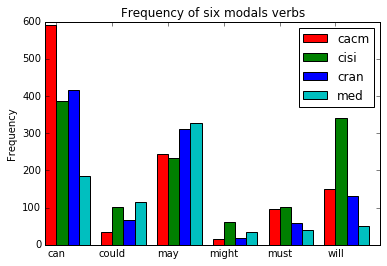

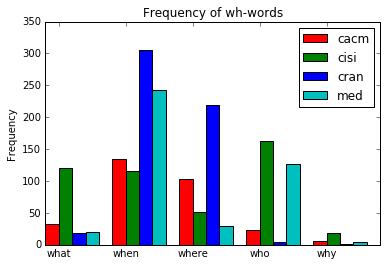

In [101]:
from numpy import arange
from matplotlib import pyplot


# colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black
# "Plot a bar chart showing counts for each word by category"
def bar_chart(categories, words, counts, ylabel, title, colors='rgbcmyk', legendloc = 'upper left'):
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind + c * width, counts[categories[c]], width, color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind + width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc=legendloc)
    pyplot.ylabel(ylabel)
    pyplot.title(title)
    pyplot.show()

modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
    (cat, word.lower()) for cat in cats for word in corpus_reader.words(categories=cat) if word in modals)
counts = {}
for cat in cats:
    counts[cat] = [cfdist[cat][word] for word in modals]
bar_chart(cats, modals, counts, 'Frequency', 'Frequency of six modals verbs', legendloc='upper right')

whs = ['what', 'when', 'where', 'who', 'why']
cfdist = nltk.ConditionalFreqDist(
    (cat, word.lower()) for cat in cats for word in corpus_reader.words(categories=cat) if word in whs)
counts = {}
for cat in cats:
    counts[cat] = [cfdist[cat][word] for word in whs]
bar_chart(cats, whs, counts, 'Frequency', 'Frequency of wh-words', legendloc='upper right')

Low frequency words or unusual words.

In [96]:
import nltk


def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

for i, cat in enumerate(cats):
    print("First 20 low frequency words for category: " + cat.upper())
    print(unusual_words(corpus_reader.words(categories=cat))[0:20])

First 20 low frequency words for category: CACM


['abandoning', 'abbott', 'abbreviated', 'abbreviating', 'abbreviations', 'abcd', 'abd', 'abilities', 'abrahams', 'abscissas', 'abstracting', 'abstractions', 'abstracts', 'academicians', 'accelerates', 'accelerating', 'accepting', 'accepts', 'accessed', 'accesses']
First 20 low frequency words for category: CISI


['aacr', 'abandons', 'abbreviated', 'abbreviating', 'abbreviations', 'aberrystwyth', 'abidjan', 'abilities', 'abno', 'abolished', 'abolishing', 'aboutness', 'abrades', 'abstracting', 'abstractors', 'abstracts', 'academia', 'academicians', 'accademia', 'accelerators']
First 20 low frequency words for category: CRAN


['abbreviated', 'ablated', 'ablating', 'accelerates', 'accelerating', 'accelerations', 'accelerators', 'accentuated', 'accommodated', 'accompanied', 'accompanies', 'accompanying', 'accounted', 'accounts', 'accumulated', 'accumulations', 'achieved', 'achieving', 'ackeret', 'acr']
First 20 low frequency words for category: MED


['aaf', 'aas', 'abdominis', 'aberrations', 'abilities', 'abnormali', 'abnormalities', 'abolished', 'abortions', 'abs', 'abscesses', 'abscopal', 'absorbancy', 'absorptions', 'abstr', 'ac', 'aca', 'acalculia', 'acanthocheilonema', 'accelera']


High frequency words.

Stemming

In [ ]:
from nltk import word_tokenize
import re

# simple stemmer
def stem(word):
    regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
    stem, suffix = re.findall(regexp, word)[0]
    return stem

tokens = word_tokenize(raw)
[stem(t) for t in tokens]

corpus_reader.findall(r"<a> (<.*>) <man>")

**Normalizing text** 
* __Stemming__ The Porter and Lancaster stemmers follow their own rules for stripping affixes. Observe that the Porter stemmer correctly handles the word lying (mapping it to lie), while the Lancaster stemmer does not. Stemming is not a well-defined process, and we typically pick the stemmer that best suits the application we have in mind. The Porter Stemmer is a good choice if you are indexing some texts and want to support search using alternative forms of words.
* __Lemmanization__  The WordNet lemmatizer only removes affixes if the resulting word is in its dictionary. This additional checking process makes the lemmatizer slower than the above stemmers. Notice that it doesn't handle lying, but it converts women to woman. The WordNet lemmatizer is a good choice if you want to compile the vocabulary of some texts and want a list of valid lemmas (or lexicon headwords).
* __Non-standard words__ Another normalization task involves identifying non-standard words including numbers, abbreviations, and dates, and mapping any such tokens to a special vocabulary. For example, every decimal number could be mapped to a single token 0.0, and every acronym could be mapped to AAA. This keeps the vocabulary small and improves the accuracy of many language modeling tasks.

In [ ]:
porter = nltk.PorterStemmer()
>>> lancaster = nltk.LancasterStemmer()
>>> [porter.stem(t) for t in tokens]
>>> [lancaster.stem(t) for t in tokens]
>>> wnl = nltk.WordNetLemmatizer()
>>> [wnl.lemmatize(t) for t in tokens]

Tokenization
* __Simple__ by regular expression
* Using ntlk.regexp_tokenize()

In [ ]:
>>> text = 'That U.S.A. poster-print costs $12.40...'
>>> pattern = r'''(?x)    # set flag to allow verbose regexps
...     ([A-Z]\.)+        # abbreviations, e.g. U.S.A.
...   | \w+(-\w+)*        # words with optional internal hyphens
...   | \$?\d+(\.\d+)?%?  # currency and percentages, e.g. $12.40, 82%
...   | \.\.\.            # ellipsis
...   | [][.,;"'?():-_`]  # these are separate tokens; includes ], [
... '''
>>> nltk.regexp_tokenize(text, pattern)
['That', 'U.S.A.', 'poster-print', 'costs', '$12.40', '...']